In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, MaxPooling2D, Convolution2D
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.utils import to_categorical
import itertools

In [ ]:
train_x.shape

(60000, 28, 28)

#Classification with DNN




In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

In [ ]:
train_x = train_x.reshape(60000,28,28,1)
test_x = test_x.reshape(10000,28,28,1)

In [ ]:
train_y= to_categorical(train_y)
test_y= to_categorical(test_y)

In [ ]:
train_x =tf.image.convert_image_dtype(train_x, tf.float32)
train_x=train_x/255
test_x =tf.image.convert_image_dtype(test_x, tf.float32)
test_x = test_x/255


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y))
train_dataset = train_dataset.shuffle(buffer_size=10000).batch(batch_size=128).repeat()

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_x, test_y))
test_dataset = test_dataset.shuffle(buffer_size=10000).batch(batch_size=128).repeat()


In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=["accuracy"])

In [ ]:
batch_size=128
Epochs=250
STEPS_PER_EPOCH=100

history=model.fit(train_dataset,epochs=Epochs,validation_data=test_dataset,
                  steps_per_epoch=STEPS_PER_EPOCH,validation_steps=50,verbose=1,shuffle=False)

Train on 100 steps, validate on 50 steps
Epoch 1/250
100/100 [==============================] - 1s 6ms/step - loss: 1.4141 - accuracy: 0.5197 - val_loss: 0.8866 - val_accuracy: 0.6780
Epoch 2/250
100/100 [==============================] - 1s 6ms/step - loss: 0.7650 - accuracy: 0.7226 - val_loss: 0.6890 - val_accuracy: 0.7534
Epoch 3/250
100/100 [==============================] - 1s 6ms/step - loss: 0.6243 - accuracy: 0.7749 - val_loss: 0.6318 - val_accuracy: 0.7680
Epoch 4/250
100/100 [==============================] - 1s 6ms/step - loss: 0.5822 - accuracy: 0.7903 - val_loss: 0.5575 - val_accuracy: 0.7994
Epoch 5/250
100/100 [==============================] - 1s 6ms/step - loss: 0.5442 - accuracy: 0.7997 - val_loss: 0.5498 - val_accuracy: 0.8008
Epoch 6/250
100/100 [==============================] - 1s 6ms/step - loss: 0.5267 - accuracy: 0.8089 - val_loss: 0.5372 - val_accuracy: 0.8019
Epoch 7/250
100/100 [==============================] - 1s 6ms/step - loss: 0.4927 - accuracy: 0.8229 

In [ ]:
loss_value,acc_value=model.evaluate(test_dataset,steps=50,verbose=0)
print("Test Accuracy ", acc_value)

Test Accuracy  0.878125


Accuracy of DNN is 87%

### CNN model


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_x_cn, train_y_cn), (test_x_cn, test_y_cn) = fashion_mnist.load_data()



In [ ]:
train_x_cn = train_x_cn.reshape(60000,28,28,1)
test_x_cn = test_x_cn.reshape(10000,28,28,1)

train_y_cn= to_categorical(train_y_cn)
test_y_cn= to_categorical(test_y_cn)

train_x_cn =tf.image.convert_image_dtype(train_x_cn, tf.float32)
train_x_cn=train_x_cn/255
test_x_cn =tf.image.convert_image_dtype(test_x_cn, tf.float32)
test_x_cn = test_x_cn/255

In [ ]:
train_dataset_cn = tf.data.Dataset.from_tensor_slices((train_x_cn, train_y_cn))
train_dataset_cn = train_dataset_cn.shuffle(buffer_size=10000).batch(batch_size=128).repeat()
test_dataset_cn = tf.data.Dataset.from_tensor_slices((test_x_cn, test_y_cn))
test_dataset_cn = test_dataset_cn.shuffle(buffer_size=10000).batch(batch_size=128).repeat()

In [ ]:
model_cnn = Sequential()
model_cnn.add(Convolution2D(64, kernel_size=3, activation='relu',input_shape=(28,28,1)))
model_cnn.add(Convolution2D(32, kernel_size=3, activation='relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(10, activation='softmax'))
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
Epochs=250
STEPS_PER_EPOCH=100

history=model_cnn.fit(train_dataset_cn, epochs=Epochs,validation_data=test_dataset_cn,
                  steps_per_epoch=STEPS_PER_EPOCH,validation_steps=50,verbose=1,shuffle=True)

Epoch 1/250
100/100 [==============================] - 2s 18ms/step - loss: 1.5659 - accuracy: 0.4831 - val_loss: 0.8475 - val_accuracy: 0.6888
Epoch 2/250
100/100 [==============================] - 2s 16ms/step - loss: 0.7447 - accuracy: 0.7312 - val_loss: 0.6875 - val_accuracy: 0.7459
Epoch 3/250
100/100 [==============================] - 2s 16ms/step - loss: 0.6379 - accuracy: 0.7680 - val_loss: 0.6496 - val_accuracy: 0.7517
Epoch 4/250
100/100 [==============================] - 2s 16ms/step - loss: 0.5904 - accuracy: 0.7820 - val_loss: 0.6108 - val_accuracy: 0.7708
Epoch 5/250
100/100 [==============================] - 2s 17ms/step - loss: 0.5741 - accuracy: 0.7877 - val_loss: 0.5848 - val_accuracy: 0.7861
Epoch 6/250
100/100 [==============================] - 2s 16ms/step - loss: 0.5537 - accuracy: 0.7985 - val_loss: 0.5707 - val_accuracy: 0.7942
Epoch 7/250
100/100 [==============================] - 2s 16ms/step - loss: 0.5415 - accuracy: 0.8028 - val_loss: 0.5481 - val_accuracy:

In [ ]:
loss_value,acc_value=model_cnn.evaluate(test_dataset_cn,steps=50,verbose=0)
print("Test Accuracy ", acc_value)

Test Accuracy  0.8987500071525574


Accuracy of CNN is 89%. Slightly higher than DNN.


### Data augmentation


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_x_cn, train_y_cn), (test_x_cn, test_y_cn) = fashion_mnist.load_data()


In [ ]:
train_x_cn = train_x_cn.reshape(60000,28,28,1)
test_x_cn = test_x_cn.reshape(10000,28,28,1)

train_y_cn= to_categorical(train_y_cn)
test_y_cn= to_categorical(test_y_cn)

train_x_cn =tf.image.convert_image_dtype(train_x_cn, tf.float32)
train_x_cn=train_x_cn/255
test_x_cn =tf.image.convert_image_dtype(test_x_cn, tf.float32)
test_x_cn = test_x_cn/255

In [ ]:
train_dataset_cn = tf.data.Dataset.from_tensor_slices((train_x_cn, train_y_cn))
train_dataset_cn = train_dataset_cn.shuffle(buffer_size=10000).batch(batch_size=128).repeat()
test_dataset_cn = tf.data.Dataset.from_tensor_slices((test_x_cn, test_y_cn))
test_dataset_cn = test_dataset_cn.shuffle(buffer_size=10000).batch(batch_size=128).repeat()

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [ ]:
train_datagen = ImageDataGenerator( 
        rotation_range=10,        # randomly rotate between 0-rotation_range angle
        width_shift_range=0.2,    # randomly shift horizontally by this much
        height_shift_range=0.2,   # randomly shift vertically by this muc          
        zoom_range=0.2,           # randomly zoom (80% - 120%)
        horizontal_flip=True,
        fill_mode='nearest'       # fill any pixels lost in xform with nearest
    )
	

In [ ]:
datagen= ImageDataGenerator()

In [ ]:
train_gen= train_datagen.flow(train_x_cn, train_y_cn, batch_size=128)
test_gen= datagen.flow(test_x_cn, test_y_cn, batch_size=128)

In [ ]:
model_DA = Sequential()
model_DA.add(Convolution2D(64, kernel_size=3, activation='relu',input_shape=(28,28,1)))
model_DA.add(Convolution2D(32, kernel_size=3, activation='relu'))
model_DA.add(Flatten())
model_DA.add(Dense(10, activation='softmax'))
model_DA.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
Epochs=250
STEPS_PER_EPOCH=100

history=model_DA.fit(train_gen, epochs=Epochs,validation_data=test_gen,
                  steps_per_epoch=STEPS_PER_EPOCH,validation_steps=50,verbose=1,shuffle=True)

Epoch 1/250
100/100 [==============================] - 5s 46ms/step - loss: 1.2377 - accuracy: 0.5547 - val_loss: 1.0217 - val_accuracy: 0.6381
Epoch 2/250
100/100 [==============================] - 5s 46ms/step - loss: 1.2355 - accuracy: 0.5546 - val_loss: 1.0739 - val_accuracy: 0.6167
Epoch 3/250
100/100 [==============================] - 5s 47ms/step - loss: 1.2167 - accuracy: 0.5568 - val_loss: 1.0042 - val_accuracy: 0.6544
Epoch 4/250
100/100 [==============================] - 5s 47ms/step - loss: 1.2033 - accuracy: 0.5638 - val_loss: 1.0183 - val_accuracy: 0.6442
Epoch 5/250
100/100 [==============================] - 5s 46ms/step - loss: 1.1972 - accuracy: 0.5661 - val_loss: 0.9972 - val_accuracy: 0.6644
Epoch 6/250
100/100 [==============================] - 5s 47ms/step - loss: 1.2021 - accuracy: 0.5654 - val_loss: 1.0094 - val_accuracy: 0.6433
Epoch 7/250
100/100 [==============================] - 5s 49ms/step - loss: 1.1875 - accuracy: 0.5759 - val_loss: 0.9832 - val_accuracy:

In [ ]:
loss_value,acc_value=model_DA.evaluate(test_gen,steps=50,verbose=0)
print("Test Accuracy ", acc_value)

Test Accuracy  0.7221875190734863


Accuracy of CNN after the Data Augmentation is 72%

### Transfer learning / VGG16




In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_x_tl, train_y_tl), (test_x_tl, test_y_tl) = fashion_mnist.load_data()

In [ ]:
train_x_tl =tf.image.convert_image_dtype(train_x_tl, tf.float32)
train_x_tl=train_x_tl/255

test_x_tl =tf.image.convert_image_dtype(test_x_tl, tf.float32)
test_x_tl = test_x_tl/255

train_y_tl= to_categorical(train_y_tl)
test_y_tl= to_categorical(test_y_tl)



In [ ]:
train_x_tl= tf.image.grayscale_to_rgb(tf.expand_dims(train_x_tl, axis=3))
test_x_tl= tf.image.grayscale_to_rgb(tf.expand_dims(test_x_tl, axis=3))
train_x_tl.shape, test_x_tl.shape

(TensorShape([60000, 28, 28, 3]), TensorShape([10000, 28, 28, 3]))

In [ ]:
IMAGE_SIZE=32
train_x_tl = tf.image.resize(train_x_tl, (IMAGE_SIZE, IMAGE_SIZE))
test_x_tl =tf.image.resize(test_x_tl, (IMAGE_SIZE, IMAGE_SIZE))

In [ ]:
train_x_tl.shape

TensorShape([60000, 32, 32, 3])

In [ ]:
train_dataset_tl = tf.data.Dataset.from_tensor_slices((train_x_tl, train_y_tl))
train_dataset_tl = train_dataset_tl.shuffle(buffer_size=10000).batch(batch_size=128).repeat()
test_dataset_tl = tf.data.Dataset.from_tensor_slices((test_x_tl, test_y_tl))
test_dataset_tl = test_dataset_tl.shuffle(buffer_size=10000).batch(batch_size=128).repeat()

In [ ]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False, 
                  input_shape=(32,32,3),
                  classes=10)
conv_base.trainable = False
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [ ]:
  from tensorflow.keras import models
  from tensorflow.keras import layers
  from tensorflow.keras import optimizers
  
  model_TL = Sequential()
  model_TL.add(conv_base)
  model_TL.add(layers.Flatten())
  model_TL.add(layers.Dense(256, activation='relu'))
  model_TL.add(layers.Dropout(0.7))
  model_TL.add(layers.Dense(10, activation='softmax'))

  model_TL.compile(optimizer='Adam',
                loss='categorical_crossentropy',
                metrics=['acc'])

 


model_TL.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_9 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                2570      
Total params: 14,848,586
Trainable params: 133,898
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
Epochs=50
STEPS_PER_EPOCH=60000/128

history=model_TL.fit(train_dataset_tl, epochs=Epochs,validation_data=test_dataset_tl,
                  steps_per_epoch=STEPS_PER_EPOCH,validation_steps=50,verbose=1,shuffle=True)

Epoch 1/50
469/468 [==============================] - 7s 15ms/step - loss: 2.3124 - acc: 0.1001 - val_loss: 2.3026 - val_acc: 0.1028
Epoch 2/50
469/468 [==============================] - 7s 15ms/step - loss: 2.3027 - acc: 0.0989 - val_loss: 2.3026 - val_acc: 0.1022
Epoch 3/50
469/468 [==============================] - 7s 15ms/step - loss: 2.3027 - acc: 0.0969 - val_loss: 2.3026 - val_acc: 0.1016
Epoch 4/50
469/468 [==============================] - 7s 15ms/step - loss: 2.3027 - acc: 0.0972 - val_loss: 2.3027 - val_acc: 0.0980
Epoch 5/50
469/468 [==============================] - 7s 15ms/step - loss: 2.3027 - acc: 0.0967 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/50
469/468 [==============================] - 7s 15ms/step - loss: 2.3027 - acc: 0.0952 - val_loss: 2.3026 - val_acc: 0.1002
Epoch 7/50
469/468 [==============================] - 7s 15ms/step - loss: 2.3027 - acc: 0.0978 - val_loss: 2.3026 - val_acc: 0.0983
Epoch 8/50
469/468 [==============================] - 7s 15ms/step - 

In [ ]:
loss_value,acc_value=model_TL.evaluate(test_dataset_tl,steps=50,verbose=0)
print("Test Accuracy ", acc_value)

Test Accuracy  0.09984374791383743


In [ ]:
#FineTuning

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
  model_TL_FT = Sequential()
  model_TL_FT.add(conv_base)
  model_TL_FT.add(layers.Flatten())
  model_TL_FT.add(layers.Dense(256, activation='relu'))
  model_TL_FT.add(layers.Dropout(0.5))
  model_TL_FT.add(layers.Dense(10, activation='softmax'))

  model_TL_FT.compile(optimizer='Adam',
                loss='binary_crossentropy',
                metrics=['acc'])

In [ ]:
Epochs=50
STEPS_PER_EPOCH=50

history=model_TL_FT.fit(train_dataset_tl, epochs=Epochs,validation_data=test_dataset_tl,
                  steps_per_epoch=STEPS_PER_EPOCH,validation_steps=50,verbose=1,shuffle=True)

Epoch 1/50
50/50 [==============================] - 2s 40ms/step - loss: 0.3295 - acc: 0.1017 - val_loss: 0.3251 - val_acc: 0.1034
Epoch 2/50
50/50 [==============================] - 2s 36ms/step - loss: 0.3251 - acc: 0.0969 - val_loss: 0.3251 - val_acc: 0.1023
Epoch 3/50
50/50 [==============================] - 2s 36ms/step - loss: 0.3251 - acc: 0.1048 - val_loss: 0.3251 - val_acc: 0.1003
Epoch 4/50
50/50 [==============================] - 2s 36ms/step - loss: 0.3251 - acc: 0.0934 - val_loss: 0.3251 - val_acc: 0.1036
Epoch 5/50
50/50 [==============================] - 2s 36ms/step - loss: 0.3251 - acc: 0.0855 - val_loss: 0.3251 - val_acc: 0.1005
Epoch 6/50
50/50 [==============================] - 2s 36ms/step - loss: 0.3251 - acc: 0.1053 - val_loss: 0.3251 - val_acc: 0.0989
Epoch 7/50
50/50 [==============================] - 2s 36ms/step - loss: 0.3251 - acc: 0.0961 - val_loss: 0.3251 - val_acc: 0.1006
Epoch 8/50
50/50 [==============================] - 2s 36ms/step - loss: 0.3251 - a

In [ ]:
loss_value,acc_value=model_TL_FT.evaluate(test_dataset_tl,steps=50,verbose=0)
print("Test Accuracy ", acc_value)

Test Accuracy  0.09812500327825546


### Performance comparison



>Configuration | Accuracy Score
>--- | ---
>DNN | 87.8
>CNN | 89.8
>Data Augmentation | 72.2
>VGG16 | 9.9
>VGG16 with Fine-tuning |9.8

CNN performed better than other models with accuracy of 89.8%. And CNN with Data Augmentation performed better than VGG16 with or without tuning. Data Augmentation is the best practice to improve generalisation properties and it reduces overfitting of the model in this problem.

VGG makes use of lot of filters and aspects such as parameters brings complexity to VGG whihc might be the reason for low accuracy. 

###  CIFAR10 dataset




In [ ]:
from tensorflow.keras.datasets import cifar10
cifar10 = keras.datasets.cifar10

(train_x_r, train_y_r), (test_x_r, test_y_r) = cifar10.load_data()


170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
train_y_r=to_categorical(train_y_r)
test_y_r=to_categorical(test_y_r)

train_x_r=train_x_r/255.0
test_x_r=test_x_r/255.0

In [ ]:
print(train_x_r.shape,test_x_r.shape,train_y_r.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 10)


In [ ]:
  from tensorflow.keras import layers
  model = Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu',
                          input_shape=(32,32,3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  #model.add(layers.Flatten())
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='sigmoid'))

  model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history=model.fit(train_x_r,train_y_r,epochs=100,validation_data=(test_x_r,test_y_r))

Epoch 1/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5947 - accuracy: 0.4124 - val_loss: 1.2810 - val_accuracy: 0.5436
Epoch 2/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2099 - accuracy: 0.5689 - val_loss: 1.0756 - val_accuracy: 0.6194
Epoch 3/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0454 - accuracy: 0.6339 - val_loss: 1.0291 - val_accuracy: 0.6365
Epoch 4/100
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9424 - accuracy: 0.6680 - val_loss: 0.9104 - val_accuracy: 0.6782
Epoch 5/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8756 - accuracy: 0.6943 - val_loss: 0.9194 - val_accuracy: 0.6818
Epoch 6/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8189 - accuracy: 0.7137 - val_loss: 0.8428 - val_accuracy: 0.7079
Epoch 7/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7705 - accuracy: 0.7300 - val_loss: 0.8300 - val_ac

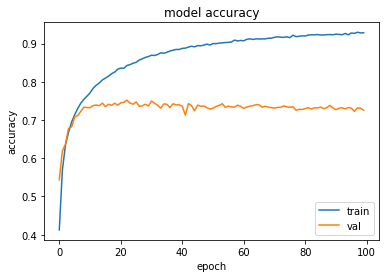

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [ ]:
acc_value=model.evaluate(test_x_r,test_y_r)
print("Test Accuracy ", acc_value)

313/313 [==============================] - 1s 3ms/step - loss: 1.2254 - accuracy: 0.7258
Test Accuracy  [1.225420355796814, 0.7257999777793884]


Accuracy of CNN model with CIFAR dataset is 72.5%

####  Training  ResNet



In [ ]:
train_dataset_r = tf.data.Dataset.from_tensor_slices((train_x_r, train_y_r))
train_dataset_r = train_dataset_r.shuffle(buffer_size=10000).batch(batch_size=128).repeat()
test_dataset_r = tf.data.Dataset.from_tensor_slices((test_x_r, test_y_r))
test_dataset_r = test_dataset_r.shuffle(buffer_size=10000).batch(batch_size=128).repeat()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen_r = ImageDataGenerator(rotation_range = 10, horizontal_flip = True, zoom_range = 0.1)
data_r= ImageDataGenerator()
train_gen_r= datagen_r.flow(train_x_r, train_y_r, batch_size=128)
test_gen_r= data_r.flow(test_x_r, test_y_r, batch_size=128)

In [ ]:
  model_r_1 = Sequential()
  model_r_1.add(layers.Conv2D(32, (3, 3), activation='relu',
                          input_shape=(32,32,3)))
  model_r_1.add(layers.MaxPooling2D((2, 2)))
  model_r_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model_r_1.add(layers.MaxPooling2D((2, 2)))
  model_r_1.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model_r_1.add(layers.MaxPooling2D((2, 2)))
  model_r_1.add(layers.Flatten())
  model_r_1.add(layers.Dropout(0.2))
  model_r_1.add(layers.Dense(128, activation='relu'))
  model_r_1.add(layers.Dense(10, activation='sigmoid'))

  model_r_1.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate = 0.1),
              metrics=['accuracy'])

In [ ]:
Epochs=100
STEPS_PER_EPOCH=50

history=model_r_1.fit(train_gen_r, epochs=Epochs,validation_data=test_gen_r,
                  steps_per_epoch=STEPS_PER_EPOCH,validation_steps=50,verbose=1,shuffle=True)

Epoch 1/100
50/50 [==============================] - 2s 47ms/step - loss: 2.2978 - accuracy: 0.1214 - val_loss: 2.2902 - val_accuracy: 0.1806
Epoch 2/100
50/50 [==============================] - 2s 46ms/step - loss: 2.2780 - accuracy: 0.1475 - val_loss: 2.2454 - val_accuracy: 0.1928
Epoch 3/100
50/50 [==============================] - 2s 46ms/step - loss: 2.2254 - accuracy: 0.1744 - val_loss: 2.1853 - val_accuracy: 0.1983
Epoch 4/100
50/50 [==============================] - 2s 46ms/step - loss: 2.1772 - accuracy: 0.1991 - val_loss: 2.0845 - val_accuracy: 0.2248
Epoch 5/100
50/50 [==============================] - 2s 46ms/step - loss: 2.1270 - accuracy: 0.2205 - val_loss: 2.0360 - val_accuracy: 0.2602
Epoch 6/100
50/50 [==============================] - 2s 47ms/step - loss: 2.0724 - accuracy: 0.2384 - val_loss: 2.0459 - val_accuracy: 0.2598
Epoch 7/100
50/50 [==============================] - 2s 46ms/step - loss: 2.0290 - accuracy: 0.2492 - val_loss: 2.0411 - val_accuracy: 0.2745
Epoch 

In [ ]:
acc_value=model_r_1.evaluate(test_x_r,test_y_r)
print("Accuracy of the Resnet is ",acc_value[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.9870 - accuracy: 0.6499
Accuracy of the Resnet is  0.6499000191688538


Accuracy of Resnet model is 64.9%

### Training of ResNet using learning rate schedule


In [ ]:
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,decay_steps=100000,decay_rate=0.96,staircase=True)

optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule)

In [ ]:
model_r.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
Epochs=100
history=model_r.fit(train_gen_r, epochs=Epochs,validation_data=test_gen_r,
                  steps_per_epoch=STEPS_PER_EPOCH,validation_steps=50,verbose=1,shuffle=True)

Epoch 1/100
50/50 [==============================] - 2s 49ms/step - loss: 11.3515 - accuracy: 0.1111 - val_loss: 11.5559 - val_accuracy: 0.1022
Epoch 2/100
50/50 [==============================] - 2s 47ms/step - loss: 11.5536 - accuracy: 0.1003 - val_loss: 11.5583 - val_accuracy: 0.1000
Epoch 3/100
50/50 [==============================] - 2s 47ms/step - loss: 11.6193 - accuracy: 0.0969 - val_loss: 11.6122 - val_accuracy: 0.1008
Epoch 4/100
50/50 [==============================] - 2s 49ms/step - loss: 11.8258 - accuracy: 0.0908 - val_loss: 11.6428 - val_accuracy: 0.0997
Epoch 5/100
50/50 [==============================] - 2s 47ms/step - loss: 11.7061 - accuracy: 0.1008 - val_loss: 11.5841 - val_accuracy: 0.1002
Epoch 6/100
50/50 [==============================] - 2s 46ms/step - loss: 11.7085 - accuracy: 0.0986 - val_loss: 11.6263 - val_accuracy: 0.1005
Epoch 7/100
50/50 [==============================] - 2s 46ms/step - loss: 11.5254 - accuracy: 0.1022 - val_loss: 11.5817 - val_accuracy:

In [ ]:
acc_value=model_r.evaluate(test_x_r,test_y_r)
print("Accuracy of the Resnet is ",acc_value[1])

313/313 [==============================] - 1s 2ms/step - loss: 11.6123 - accuracy: 0.1000
Accuracy of the Resnet is  0.10000000149011612


Accuracy of Renet model with Lookahead optimiser is 10%

From my experiments, I can conclude that Shallow Convnet performs better in CIFAR10 datset than Resnet and Resnet with Look ahead optimisers.

Shallow ConvNet - 72.5%

Resnet -65%

Resnet with Lookahead Optimiser - 10%